In [10]:
from aif360.datasets import StandardDataset
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
custom_colors = ['#784888', '#94b3c4', '#897cac', '#d8bfd4', '#f6e8e7']
#custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
#complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

#full_palette = custom_colors + complementary_colors
#sns.set_palette(full_palette)

sns.set_palette(custom_colors)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] =20

In [12]:
df = pd.read_pickle("../data/wesad/wesad_dataset_merged.pkl")
df = df[df['stress'].notna()]
df

,id,EDA_0,EDA_1,EDA_2,EDA_3,TEMP_0,TEMP_1,TEMP_2,TEMP_3,ACC1_0,...,BVP_58,BVP_59,BVP_60,BVP_61,BVP_62,BVP_63,stress,gender,BMI,age
0,2,5452.450365,5366.846848,5264.122627,5115.746165,10279.722091,10279.722091,10279.722091,10279.722091,126.326243,...,-137.408002,-128.387507,-111.782506,-91.536409,-71.450360,-54.013997,0.0,Male,Overweight,< 30
1,2,5264.122627,5115.746165,5127.156998,5013.021944,10279.722091,10279.722091,10279.722091,10279.722091,90.734562,...,25.850055,23.818332,23.653838,23.849453,23.195923,21.515416,0.0,Male,Overweight,< 30
2,2,5127.156998,5013.021944,5372.556718,5235.591090,10279.722091,10279.722091,10279.722091,10279.722091,-27.904372,...,31.562887,28.882079,28.415272,27.312718,22.711332,13.432982,0.0,Male,Overweight,< 30
3,2,5372.556718,5235.591090,5184.228979,5155.692989,10279.722091,10279.722091,10464.748540,10464.748540,-27.904372,...,-83.391734,-65.897576,-45.375840,-26.334550,-12.494826,-5.474934,0.0,Male,Overweight,< 30
4,2,5184.228979,5155.692989,5115.746165,5081.504758,10464.748540,10464.748540,10464.748540,10464.748540,-39.768266,...,-2.358440,-2.225067,-2.042790,-1.833838,-1.958320,-2.878597,0.0,Male,Overweight,< 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78761,17,-1141.515991,-1141.515991,-1146.439053,-1141.515991,-11412.917628,-11802.683112,-11802.683112,-11802.683112,57.652528,...,12.233733,11.664393,10.917924,9.918415,8.640562,7.097016,0.0,Female,Normal,< 30
78762,17,-1146.439053,-1141.515991,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,...,-20.092160,-16.562248,-12.918468,-9.186125,-5.339913,-1.519005,0.0,Female,Normal,< 30
78763,17,-1141.515991,-1141.515991,-1136.589079,-1151.365964,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,...,11.322788,10.753448,10.146151,9.526202,8.868298,8.045917,0.0,Female,Normal,< 30
78764,17,-1136.589079,-1151.365964,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11412.917628,57.652528,...,-3.189070,-0.544800,2.213339,4.908218,7.350056,9.450290,0.0,Female,Normal,< 30


# Significant relations between labels and protected attributes

In [13]:
demographic_variables = ['age', 'gender', 'BMI']
target_variables = ['stress']

def perform_chi2_test(df, demographic_variable, target_variable):
    contingency_table = pd.crosstab(df[demographic_variable], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

results_df = pd.DataFrame(columns=['Demographic Variable', 'Target Variable', 'Chi-square Statistic', 'p-value'])

for demographic_variable in demographic_variables:
    for target_variable in target_variables:
        chi2, p = perform_chi2_test(df, demographic_variable, target_variable)
        temp_df = pd.DataFrame({
            'Demographic Variable': [demographic_variable],
            'Target Variable': [target_variable],
            'Chi-square Statistic': [chi2],
            'p-value': [p]
        })
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_19724\2936582785.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


,Demographic Variable,Target Variable,Chi-square Statistic,p-value
0,age,stress,2.091222,0.148147
1,gender,stress,7.803612,0.005214
2,BMI,stress,4.469194,0.107035


# Representation bias

In [14]:
ratios = {
    'Category': ['Gender', 'Age', 'BMI'],
    'Dataset Ratios': [0.8, 0.93, 0.73], # male, below 30, normal
    'Real EU Ratios': [0.48, 0.32, 0.45] # male, below 30, normal
}

ratios_df = pd.DataFrame(ratios)
ratios_df

,Category,Dataset Ratios,Real EU Ratios
0,Gender,0.80,0.48
1,Age,0.93,0.32
2,BMI,0.73,0.45


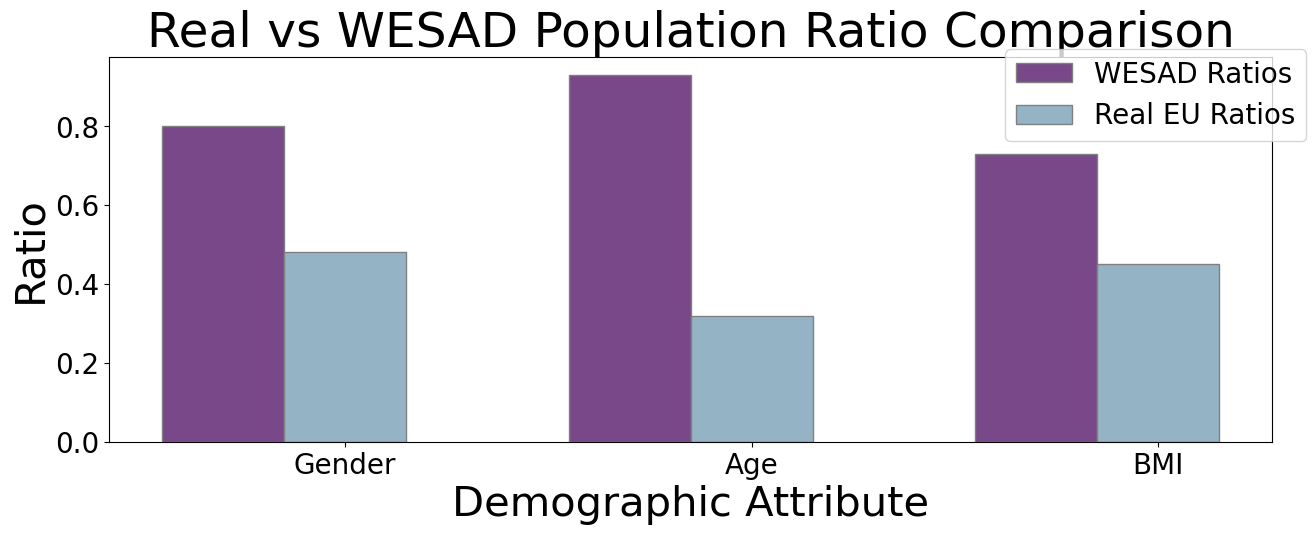

In [15]:
plt.figure(figsize=(15, 5))

barWidth = 0.3

r1 = range(len(ratios_df))
r2 = [x + barWidth for x in r1]

plt.bar(r1, ratios_df['Dataset Ratios'], color='#784888', width=barWidth, edgecolor='grey', label='WESAD Ratios')
plt.bar(r2, ratios_df['Real EU Ratios'], color='#94b3c4', width=barWidth, edgecolor='grey', label='Real EU Ratios')

plt.xlabel('Demographic Attribute')
plt.xticks([r + barWidth for r in range(len(ratios_df))], ratios_df['Category'])
plt.ylabel('Ratio')
plt.title('Real vs WESAD Population Ratio Comparison')
plt.legend(loc='center', bbox_to_anchor=(0.9, 0.9), ncol=1)
plt.savefig("../visualizations/wesad/representation-biasDepresjon.png",bbox_inches='tight')
plt.savefig("../visualizations/wesad/representation-biasDepresjon.eps",bbox_inches='tight')
plt.show()

# Data Biases

In [16]:
df = df.drop(columns=['id'])
df

,EDA_0,EDA_1,EDA_2,EDA_3,TEMP_0,TEMP_1,TEMP_2,TEMP_3,ACC1_0,ACC1_1,...,BVP_58,BVP_59,BVP_60,BVP_61,BVP_62,BVP_63,stress,gender,BMI,age
0,5452.450365,5366.846848,5264.122627,5115.746165,10279.722091,10279.722091,10279.722091,10279.722091,126.326243,233.101284,...,-137.408002,-128.387507,-111.782506,-91.536409,-71.450360,-54.013997,0.0,Male,Overweight,< 30
1,5264.122627,5115.746165,5127.156998,5013.021944,10279.722091,10279.722091,10279.722091,10279.722091,90.734562,78.870669,...,25.850055,23.818332,23.653838,23.849453,23.195923,21.515416,0.0,Male,Overweight,< 30
2,5127.156998,5013.021944,5372.556718,5235.591090,10279.722091,10279.722091,10279.722091,10279.722091,-27.904372,-63.496052,...,31.562887,28.882079,28.415272,27.312718,22.711332,13.432982,0.0,Male,Overweight,< 30
3,5372.556718,5235.591090,5184.228979,5155.692989,10279.722091,10279.722091,10464.748540,10464.748540,-27.904372,-27.904372,...,-83.391734,-65.897576,-45.375840,-26.334550,-12.494826,-5.474934,0.0,Male,Overweight,< 30
4,5184.228979,5155.692989,5115.746165,5081.504758,10464.748540,10464.748540,10464.748540,10464.748540,-39.768266,-39.768266,...,-2.358440,-2.225067,-2.042790,-1.833838,-1.958320,-2.878597,0.0,Male,Overweight,< 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78761,-1141.515991,-1141.515991,-1146.439053,-1141.515991,-11412.917628,-11802.683112,-11802.683112,-11802.683112,57.652528,57.652528,...,12.233733,11.664393,10.917924,9.918415,8.640562,7.097016,0.0,Female,Normal,< 30
78762,-1146.439053,-1141.515991,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,57.652528,...,-20.092160,-16.562248,-12.918468,-9.186125,-5.339913,-1.519005,0.0,Female,Normal,< 30
78763,-1141.515991,-1141.515991,-1136.589079,-1151.365964,-11802.683112,-11802.683112,-11802.683112,-11802.683112,57.652528,57.652528,...,11.322788,10.753448,10.146151,9.526202,8.868298,8.045917,0.0,Female,Normal,< 30
78764,-1136.589079,-1151.365964,-1141.515991,-1141.515991,-11802.683112,-11802.683112,-11802.683112,-11412.917628,57.652528,57.652528,...,-3.189070,-0.544800,2.213339,4.908218,7.350056,9.450290,0.0,Female,Normal,< 30


In [17]:
df['gender'].value_counts()

gender
Male      62924
Female    15842
Name: count, dtype: int64

In [18]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_19724\4209017409.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})


In [19]:
df['gender'].value_counts()

gender
0    62924
1    15842
Name: count, dtype: int64

In [20]:
df['age'].value_counts()

age
< 30     73492
>= 30     5274
Name: count, dtype: int64

In [21]:
df['age'] = df['age'].replace({'< 30': 0, '>= 30': 1})

C:\Users\ChristinaKaragianni\AppData\Local\Temp\ipykernel_19724\3027136165.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace({'< 30': 0, '>= 30': 1})


In [22]:
df['age'].value_counts()

age
0    73492
1     5274
Name: count, dtype: int64

In [23]:
df['BMI'].value_counts()

BMI
Normal         57936
Overweight     15528
Underweight     5302
Name: count, dtype: int64

In [24]:
df['BMI'] = df['BMI'].replace({'Normal': 0, 'Overweight': 1, 'Underweight':'2'})

In [25]:
df['BMI'].value_counts()

BMI
0    57936
1    15528
2     5302
Name: count, dtype: int64

In [26]:
protected_attributes = ['gender', 'age', 'BMI']
privileged_classes = [[0], [0], [0]] # male, below 30 years old

dataset = StandardDataset(df,
                          label_name='stress',
                          favorable_classes=[0],  # not a favorable outcome, but perhaps the most important or most desorable
                          protected_attribute_names=protected_attributes,
                          privileged_classes=privileged_classes)

df_bias_columns_metric = pd.DataFrame(columns=['protected_attribute', 'statistical_parity_difference', 'disparate_impact_ratio'])

for attr in dataset.protected_attribute_names:
    print("\nEvaluating Outcome Bias for {}".format(attr))
    idx = dataset.protected_attribute_names.index(attr)
    privileged_groups = [{attr: dataset.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr: dataset.unprivileged_protected_attributes[idx][0]}]

    metric_data = BinaryLabelDatasetMetric(dataset, unprivileged_groups=unprivileged_groups,
                                           privileged_groups=privileged_groups)

    # Using mean_difference() value as Statistical Parity Difference for explicit naming
    spd = metric_data.mean_difference()

    df_bias_columns_metric.loc[len(df_bias_columns_metric.index)] = [attr, spd, metric_data.disparate_impact()]

    print("Group Fairness - Statistical Parity Difference: {}".format(spd))
    print("Group Fairness - Disparate Impact Ratio: {}".format(metric_data.disparate_impact()))

df_bias_columns_metric


Evaluating Outcome Bias for gender
Group Fairness - Statistical Parity Difference: -0.01083530982173464
Group Fairness - Disparate Impact Ratio: 0.9855360635745507

Evaluating Outcome Bias for age
Group Fairness - Statistical Parity Difference: 0.009064130373333645
Group Fairness - Disparate Impact Ratio: 1.012144777928843

Evaluating Outcome Bias for BMI
Group Fairness - Statistical Parity Difference: 0.005423860361154054
Group Fairness - Disparate Impact Ratio: 1.0072753466818813


,protected_attribute,statistical_parity_difference,disparate_impact_ratio
0,gender,-0.010835,0.985536
1,age,0.009064,1.012145
2,BMI,0.005424,1.007275


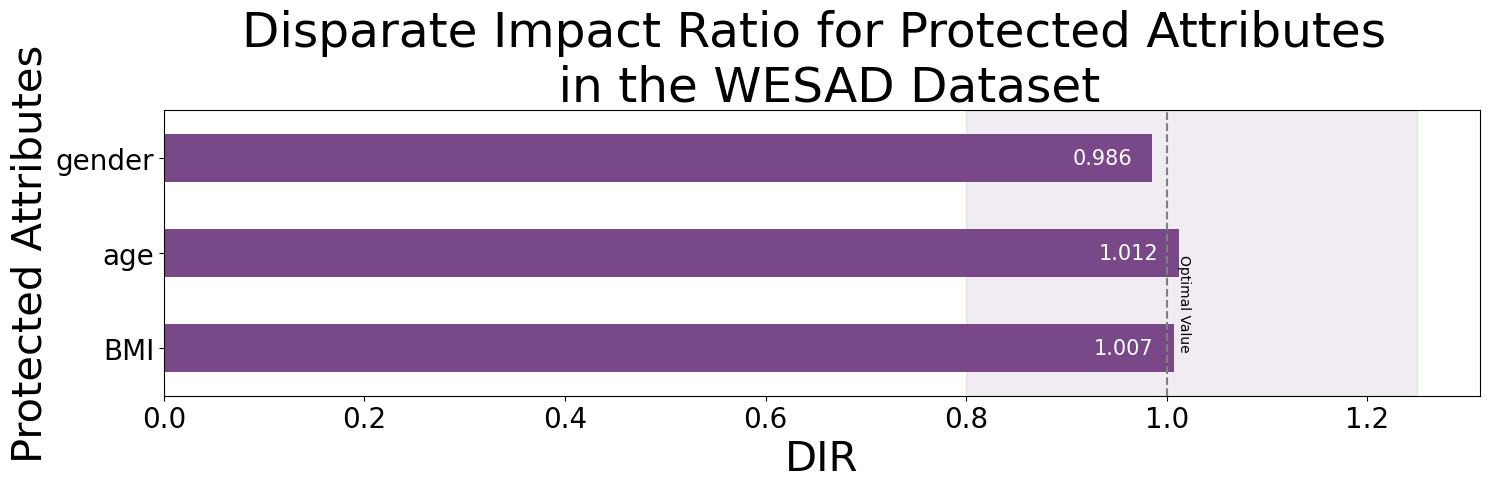

In [27]:
df_bias_columns_metric['Label'] = 'stress'
pivot_df = df_bias_columns_metric.pivot(index='protected_attribute', columns='Label', values='disparate_impact_ratio')


pivot_df.plot(kind='barh', figsize=(15, 5), legend=False)

# Add the vertical line and shaded area
plt.axvline(x=1.0, color='gray', linestyle='--')
plt.axvspan(0.8, 1.25, color='#784888', alpha=0.1)
plt.text(1.01, 0, 'Optimal Value', rotation=270)

# Set labels and title
plt.ylabel('Protected Attributes')
plt.xlabel('DIR')
plt.title('Disparate Impact Ratio for Protected Attributes \n in the WESAD Dataset')

# Adding the values at the end of each bar, slightly to the left
for i in range(len(pivot_df)):
    for j in range(len(pivot_df.columns)):
        value = pivot_df.iloc[i, j]
        plt.text(value - 0.05, i, f'{value:.3f}', ha='center', va='center', color='white', size=15)


# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("../visualizations/wesad/dir-data-biasdepresjon.png",bbox_inches='tight')
plt.savefig("../visualizations/wesad/dir-data-biasdepresjon.eps",bbox_inches='tight')
plt.show()

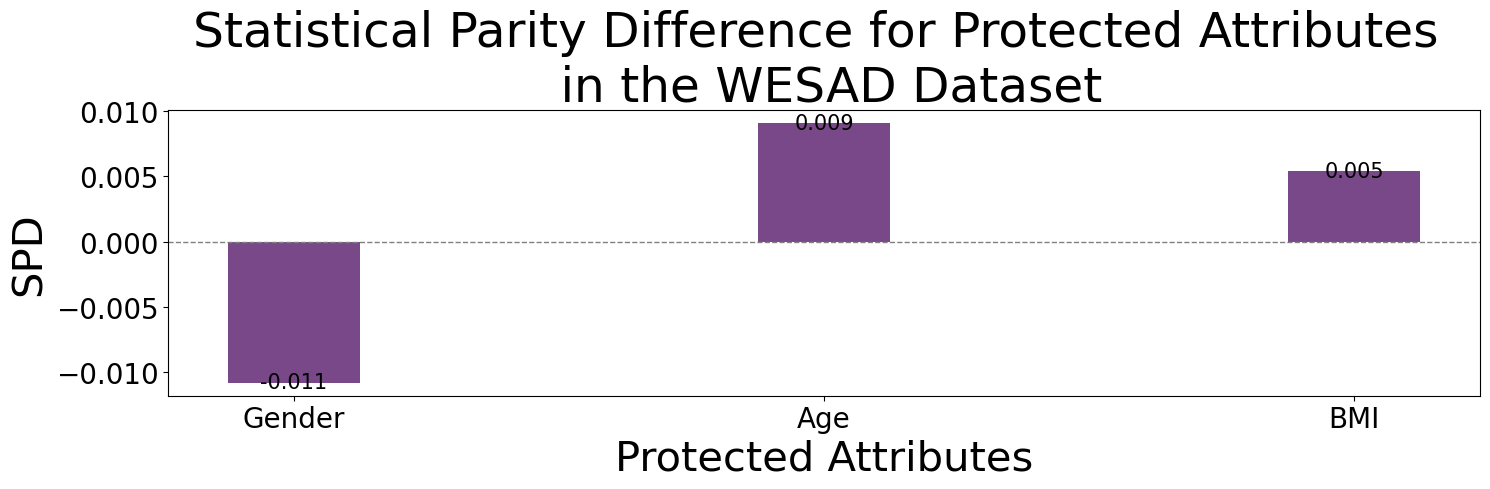

In [28]:
# Corrected assignments for each measure
spd_madrs = np.array([-0.010835, 0.009064, 0.005424])  

attributes = ['Gender', 'Age', 'BMI']
x = np.arange(len(attributes))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x, spd_madrs, width, label='MADRS')  # Center the bars at 'x'
# Add a dashed horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylabel('SPD')
ax.set_title('Statistical Parity Difference for Protected Attributes \n in the WESAD Dataset')
ax.set_xticks(x)  # Ensure x-ticks align with the bar centers
ax.set_xticklabels(attributes)
plt.xlabel('Protected Attributes')
# ax.legend()  # Remove or comment out the legend

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -7),  # Adjusting the offset to be directly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', color='black', size=15)

autolabel(rects1)
fig.tight_layout()
plt.savefig("../visualizations/WESAD/spd-data-biasdepresjon.png",bbox_inches='tight')
plt.savefig("../visualizations/WESAD/spd-data-biasdepresjon.eps",bbox_inches='tight')
plt.show()